###### The latest version of this IPython notebook is available at [http://github.com/jckantor/CBE20255](http://github.com/jckantor/CBE20255)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License](http://creativecommons.org/licenses/by-nc-sa/4.0/).

J.C. Kantor (Kantor.1@nd.edu)

# Txy and xy Diagrams for Binary Mixtures

This [Jupyter notebook](http://jupyter.org/notebook.html) illustrates the use of Raoult's Law and Antoine's equations to calculate Txy and xy diagrams for binary mixtures. The video is used with permission from [learnCheme.com](http://learncheme.ning.com/), a project at the University of Colorado funded by the National Science Foundation and the Shell Corporation.

Initialize the IPython workspace with with default settings for plots.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Introduction

For a binary mixture at a fixed pressure, the temperature/composition (Tx) diagram plots the equilibrium composition of the liquid and vapor as a function of temperature.  -XcTEknC9Aw

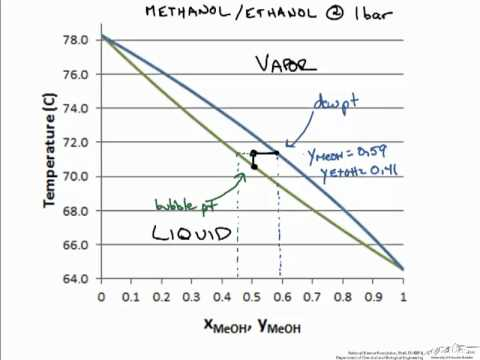

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('-XcTEknC9Aw') 

## Analysis

The basic calculations start with Raoult's law

$$P = x_A P_A^{sat}(T) + x_B P_A^{sat}(T)$$

substituting $x_B = 1-x_A$

$$P = x_A P_A^{sat}(T) + (1-x_A) P_B^{sat}(T)$$

then solving for $x_A$ and $y_A$

$$x_A = \frac{P - P_B^{sat}(T)}{P_A^{sat}(T) - P_B^{sat}(T)}$$

$$y_A = x_A\frac{P_A^{sat}(T)}{P}$$

## Plotting the Txy Diagram

The calculations in this notebook are for a representative system of two components, acetone and ethanol. We start by creating two functions to estimate vapor pressure for the individual species using Antoine's equation.

In [3]:
# Antoine's equations
A = 'methanol'
B = 'water'

def PsatA(T):
    return 10**(7.97328 - 1515.14/(T + 232.85))

def PsatB(T):
    return 10**(7.96681 - 1668.21/(T + 228.0))

For convenience, we create a function that computes the boiling of a pure component given the operating pressure and a function to compute the pure component saturation pressure.

In [4]:
from scipy.optimize import brentq

P = 760.0*(97.992/101.325)

def Tboil(Psat,P):
    return brentq(lambda T: Psat(T) - P,0,110)

print("Normal boiling  point of {:s} is {:4.1f} deg C".format(A,Tboil(PsatA,P)))
print("Normal boiling point of {:s} is {:4.1f} deg C".format(B,Tboil(PsatB,P)))

Normal boiling  point of methanol is 63.8 deg C
Normal boiling point of water is 99.1 deg C


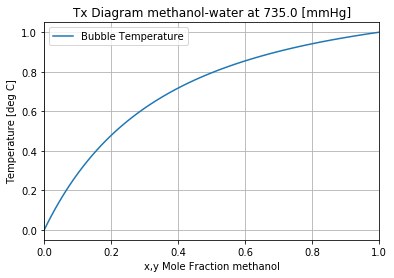

In [5]:
#P = 760

T = np.linspace(Tboil(PsatA,P),Tboil(PsatB,P))

def xA(T):
    return (P - PsatB(T))/(PsatA(T)-PsatB(T))

def yA(T):
    return xA(T)*PsatA(T)/P

plt.plot([xA(T) for T in T],[yA(T) for T in T])
plt.title('Tx Diagram {:s}-{:s} at {:.1f} [mmHg]'.format(A,B,P))
plt.legend(['Bubble Temperature','Dew Temperature'],loc='best')
plt.ylabel('Temperature [deg C]')
plt.xlabel('x,y Mole Fraction {:s}'.format(A))
plt.xlim(0,1)
plt.grid();

## xy Diagram

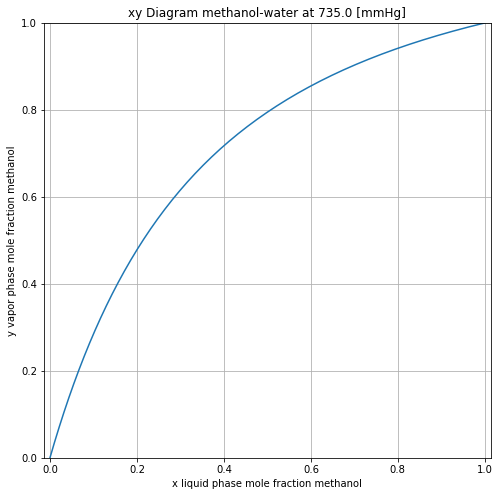

In [6]:
plt.figure(figsize=(8,8))

plt.plot([xA(T) for T in T],[yA(T) for T in T])
plt.axis('equal')
plt.title('xy Diagram {:s}-{:s} at {:.1f} [mmHg]'.format(A,B,P))
plt.xlabel('x liquid phase mole fraction {:s}'.format(A))
plt.ylabel('y vapor phase mole fraction {:s}'.format(A))
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid();

## Lever Rule

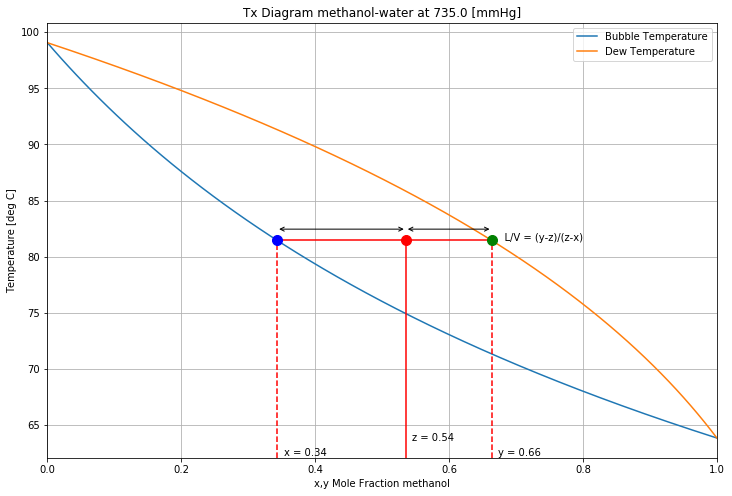

In [7]:
#P = 760

T = np.linspace(Tboil(PsatA,P),Tboil(PsatB,P))

def xA(T):
    return (P - PsatB(T))/(PsatA(T)-PsatB(T))

def yA(T):
    return xA(T)*PsatA(T)/P

plt.figure(figsize=(12,8))
plt.plot([xA(T) for T in T],T,[yA(T) for T in T],T)
plt.title('Tx Diagram {:s}-{:s} at {:.1f} [mmHg]'.format(A,B,P))
plt.legend(['Bubble Temperature','Dew Temperature'],loc='best')
plt.ylabel('Temperature [deg C]')
plt.xlabel('x,y Mole Fraction {:s}'.format(A))
plt.xlim(0,1)
plt.grid();

Te = np.mean(T)
xe = xA(Te)
ye = yA(Te)
ze = 0.4*xe + 0.6*ye

ax = plt.axis()
plt.ylim(ax[2],ax[3])
plt.plot([ze,ze],[ax[2],Te],'r')
plt.plot([xe,ye],[Te,Te],'r')
plt.plot([xe,xe],[ax[2],Te],'r--',[ye,ye],[ax[2],Te],'r--')

plt.text(xe+0.01,ax[2]+0.2,'x = {:.2}'.format(xe))
plt.text(ye+0.01,ax[2]+0.2,'y = {:.2}'.format(ye))
plt.text(ze+0.01,ax[2]+1.5,'z = {:.2}'.format(ze))

plt.annotate('', (xe,Te+1), (ze,Te+1), arrowprops={'arrowstyle':'<->'})
plt.annotate('', (ze,Te+1), (ye,Te+1), arrowprops={'arrowstyle':'<->'})

plt.annotate('    L/V = (y-z)/(z-x)',(ye,Te))

plt.plot(xe,Te,'bo',ms = 10)
plt.plot(ye,Te,'go',ms = 10)
plt.plot(ze,Te,'ro',ms = 10)


## Exercises

1. Modify this notebook to create Txy and xy diagrams for an acetaldehyde/ethanol mixture.  Create an x-y diagram, and compare to the experimental data avaiable here:

S. G. D'Avila and R. S. F. Silva, "Isothermal vapor-liquid equilibrium data by total pressure method. Systems acetaldehyde-ethanol, acetaldehyde-water, and ethanol-water," Journal of Chemical & Engineering Data, vol. 15 (3), 421-424, 1970.